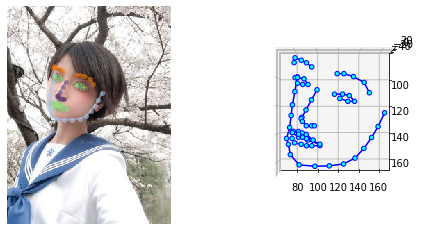

<Figure size 432x288 with 0 Axes>

In [7]:
import face_alignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import collections


# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cuda', flip_input=False, face_detector='sfd')

try:
    input_img = io.imread('../test/face1.jpg')
except FileNotFoundError:
    input_img = io.imread('test/face1.jpg')

try:
    preds = fa.get_landmarks(input_img)[-1]

    # 2D-Plot
    plot_style = dict(marker='o',
                      markersize=4,
                      linestyle='-',
                      lw=2)

    pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
    pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
                  'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
                  'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
                  'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
                  'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
                  'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
                  'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
                  'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
                  'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
                  }

    fig = plt.figure(figsize=plt.figaspect(.5))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(input_img)

    for pred_type in pred_types.values():
        ax.plot(preds[pred_type.slice, 0],
                preds[pred_type.slice, 1],
                color=pred_type.color, **plot_style)

    ax.axis('off')

    # 3D-Plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.scatter(preds[:, 0] * 1.2,
                      preds[:, 1],
                      preds[:, 2],
                      c='cyan',
                      alpha=1.0,
                      edgecolor='b')

    for pred_type in pred_types.values():
        ax.plot3D(preds[pred_type.slice, 0] * 1.2,
                  preds[pred_type.slice, 1],
                  preds[pred_type.slice, 2], color='blue')

    ax.view_init(elev=90., azim=90.)
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.show()
    plt.savefig("./Resulttest1.jpg")
except:
    print("Fail")

In [2]:
preds

array([[ 67.       ,  98.       , -43.75939  ],
       [ 65.       , 109.       , -44.336433 ],
       [ 63.       , 119.       , -44.476067 ],
       [ 62.       , 127.       , -43.485504 ],
       [ 61.       , 136.       , -38.947987 ],
       [ 59.       , 144.       , -29.785252 ],
       [ 61.       , 148.       , -18.070005 ],
       [ 63.       , 155.       ,  -6.169706 ],
       [ 70.       , 162.       ,   1.3757708],
       [ 82.       , 163.       ,   1.1514442],
       [ 93.       , 163.       ,  -4.6731296],
       [104.       , 162.       , -12.019161 ],
       [113.       , 158.       , -17.616703 ],
       [120.       , 151.       , -19.55285  ],
       [126.       , 143.       , -18.853582 ],
       [131.       , 135.       , -17.09015  ],
       [136.       , 125.       , -15.304914 ],
       [ 66.       ,  89.       ,  -4.3237605],
       [ 67.       ,  86.       ,   3.9777765],
       [ 72.       ,  88.       ,  10.501739 ],
       [ 76.       ,  90.       ,  14.92

In [3]:
print(type(input_img))

<class 'imageio.core.util.Array'>


In [4]:
from skimage import data
print(type(data.coins()))

<class 'numpy.ndarray'>


In [10]:
from skimage.io import ImageCollection

In [11]:
import cv2

image_cv = cv2.imread("./test/face1.jpg")


In [12]:
IO_image = io.imread(image_cv)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [14]:
print(type(image_cv) == type(data.coins()))

True


In [15]:
image_coin = io.imread(data.coins())

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [16]:
image_cv.dtype

dtype('uint8')

In [18]:
data.coins().dtype

dtype('uint8')

In [19]:
from skimage import viewer
image = viewer.ImageViewer(image_cv)
print(type(image_cv))

/opt/conda/lib/python3.7/site-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


AttributeError: 'QtGui_cls' object has no attribute 'QApplication'

In [20]:
io.imsave("./test.png", image_cv)
image_io = io.imread("./test.png")
print(type(image_io))

<class 'numpy.ndarray'>
